In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# 1. Calculate MSE and MAE for multiple linear regression using seaborn's diamonds dataset
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds[['carat', 'depth', 'table', 'price']].dropna()
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

MSE: 2333883.1792799835
MAE: 994.736665092202


In [3]:
# 2. Calculate MSE, MAE, and RMSE for a linear regression model
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE: 1527.7052003838908


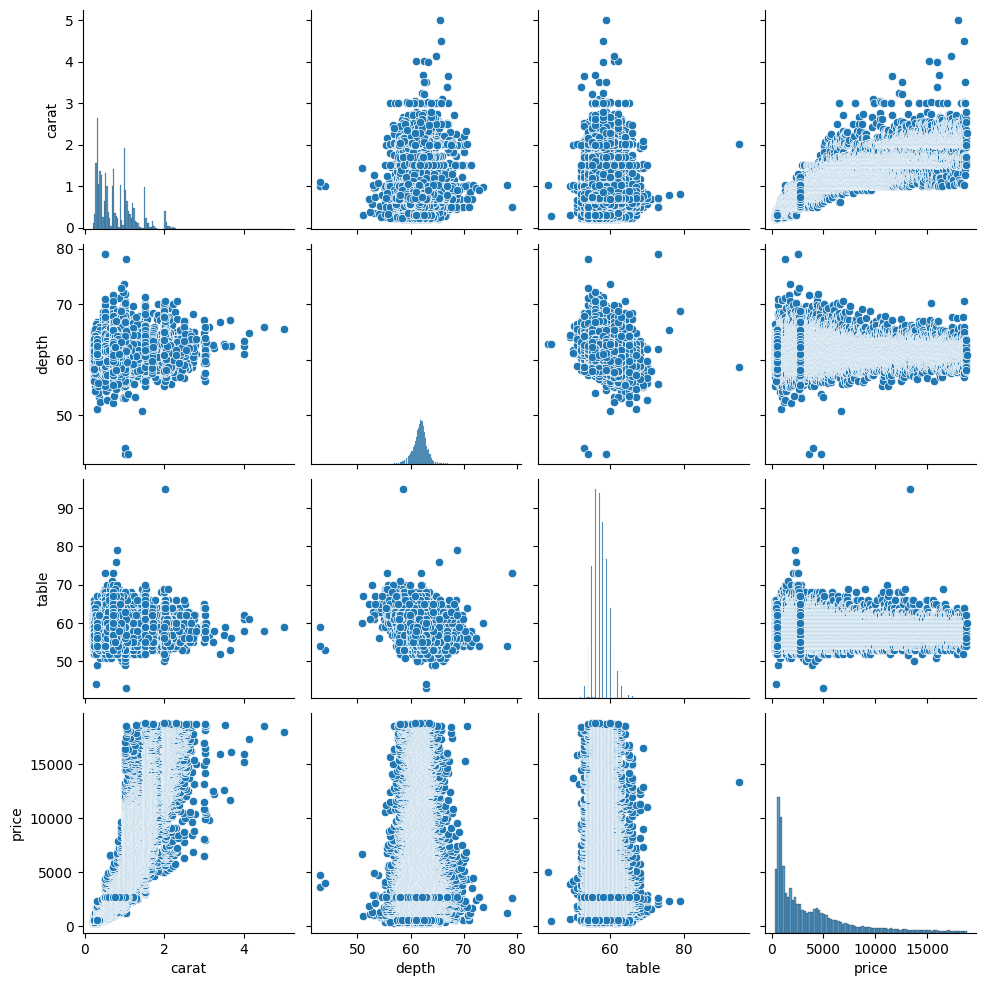

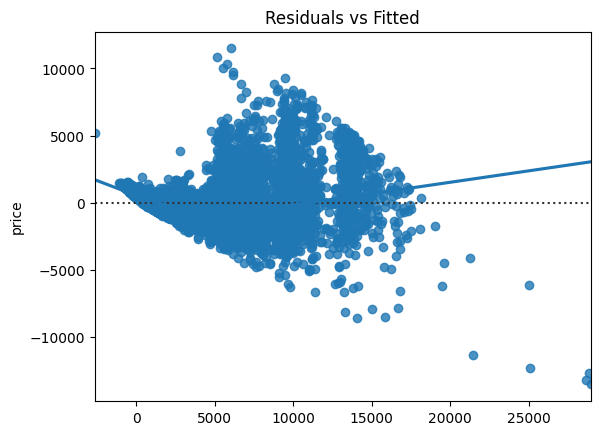

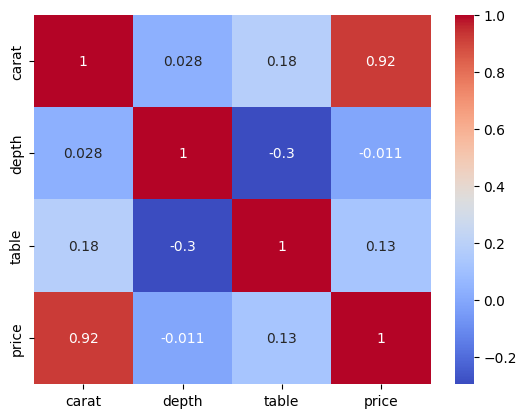

In [4]:
# 3. Check linear regression assumptions
sns.pairplot(diamonds)
plt.show()
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.title('Residuals vs Fitted')
plt.show()
correlation_matrix = diamonds.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [5]:
# 4. Machine learning pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline.fit(X_train, y_train)
print("R-squared score:", pipeline.score(X_test, y_test))

R-squared score: 0.853185544894256


In [6]:
# 5. Simple linear regression model with coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", r2_score(y_test, y_pred))

Coefficients: [7873.05329205 -150.40764283 -106.41813265]
Intercept: 13056.321710255172
R-squared: 0.853185544894256


In [7]:
# 6. Fit linear regression to tips dataset
tips = sns.load_dataset('tips')
X_tips = tips[['total_bill']]
y_tips = tips['tip']
regressor = LinearRegression()
regressor.fit(X_tips, y_tips)
print("Slope:", regressor.coef_[0])
print("Intercept:", regressor.intercept_)

Slope: 0.10502451738435337
Intercept: 0.9202696135546731


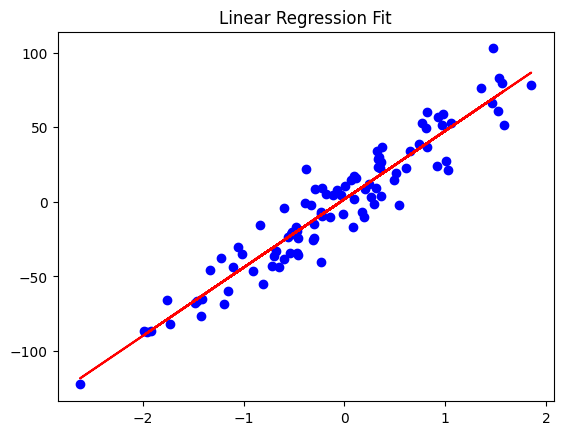

In [8]:
# 7. Linear regression on synthetic data
X_syn, y_syn = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
reg = LinearRegression()
reg.fit(X_syn, y_syn)
plt.scatter(X_syn, y_syn, color='blue')
plt.plot(X_syn, reg.predict(X_syn), color='red')
plt.title('Linear Regression Fit')
plt.show()

In [9]:
# 8. Pickle a trained model
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(regressor, f)

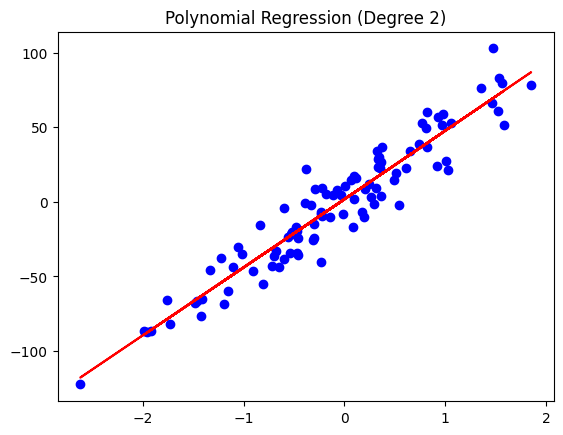

In [10]:
# 9. Polynomial regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_syn)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_syn)
plt.scatter(X_syn, y_syn, color='blue')
plt.plot(X_syn, poly_model.predict(X_poly), color='red')
plt.title('Polynomial Regression (Degree 2)')
plt.show()


In [11]:
# 10. Synthetic data and linear regression
print("Synthetic Coefficient:", reg.coef_[0])
print("Synthetic Intercept:", reg.intercept_)

Synthetic Coefficient: 45.785204830943506
Synthetic Intercept: 1.7476729807904583


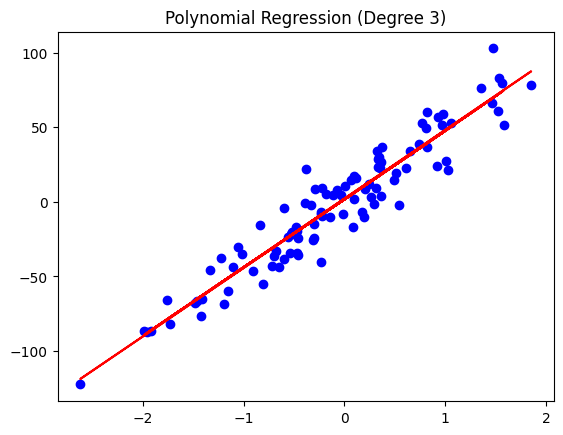

In [12]:
# 11. Polynomial regression (degree 3)
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X_syn)
poly_model3 = LinearRegression()
poly_model3.fit(X_poly3, y_syn)
plt.scatter(X_syn, y_syn, color='blue')
plt.plot(X_syn, poly_model3.predict(X_poly3), color='red')
plt.title('Polynomial Regression (Degree 3)')
plt.show()

In [13]:
# 12. Linear regression with two features
X_two = diamonds[['carat', 'table']]
y_two = diamonds['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_two, y_two, test_size=0.2, random_state=42)
reg_two = LinearRegression()
reg_two.fit(X_train2, y_train2)
print("Coefficients:", reg_two.coef_)
print("Intercept:", reg_two.intercept_)
print("R-squared:", reg_two.score(X_test2, y_test2))

Coefficients: [7832.79908924  -76.11549657]
Intercept: 2060.652253944535
R-squared: 0.8503045156350835


In [14]:
# 13. Linear regression with synthetic data and MSE, MAE, RMSE
print("Synthetic MSE:", mean_squared_error(y_syn, reg.predict(X_syn)))
print("Synthetic MAE:", mean_absolute_error(y_syn, reg.predict(X_syn)))
print("Synthetic RMSE:", np.sqrt(mean_squared_error(y_syn, reg.predict(X_syn))))

Synthetic MSE: 175.62206344778778
Synthetic MAE: 10.656739697120877
Synthetic RMSE: 13.25224748666383


In [15]:
# 14. Check multicollinearity with VIF
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


  features         VIF
0    carat    3.928109
1    depth  389.408663
2    table  396.889053


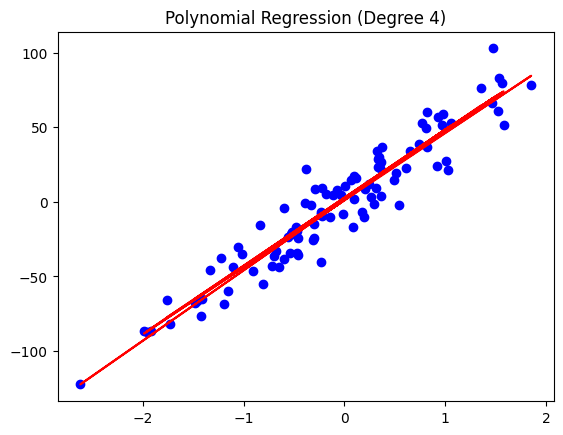

In [16]:
# 15. Polynomial regression (degree 4)
poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X_syn)
poly_model4 = LinearRegression()
poly_model4.fit(X_poly4, y_syn)
plt.scatter(X_syn, y_syn, color='blue')
plt.plot(X_syn, poly_model4.predict(X_poly4), color='red')
plt.title('Polynomial Regression (Degree 4)')
plt.show()


In [17]:
# Task 16: Machine learning pipeline with standardization and multiple linear regression
X, y = make_regression(n_samples=200, n_features=3, noise=0.1)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline.fit(X, y)
print("R-squared score:", pipeline.score(X, y))


R-squared score: 0.9999988059398166


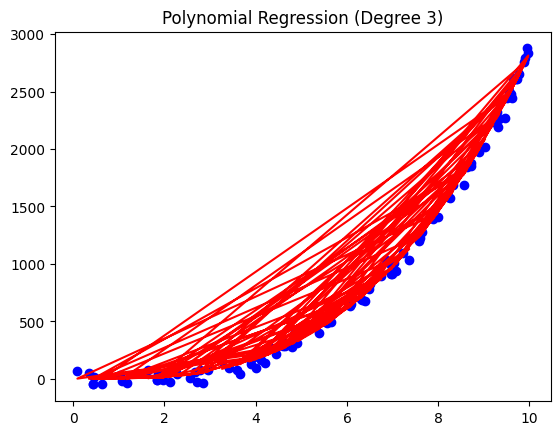

In [18]:
# Task 17: Polynomial regression (degree 3) on synthetic data
X = np.random.rand(100, 1) * 10
y = 3 * X**3 - 2 * X**2 + 4 * X + np.random.randn(100, 1) * 50
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Polynomial Regression (Degree 3)')
plt.show()

In [19]:
# Task 18: Multiple linear regression on synthetic dataset with 5 features
X, y = make_regression(n_samples=200, n_features=5, noise=0.2)
model = LinearRegression().fit(X, y)
print("R-squared score:", model.score(X, y))
print("Coefficients:", model.coef_)

R-squared score: 0.9999986322241146
Coefficients: [81.19429201 74.47838933 90.25337139 36.70858029 81.85574509]


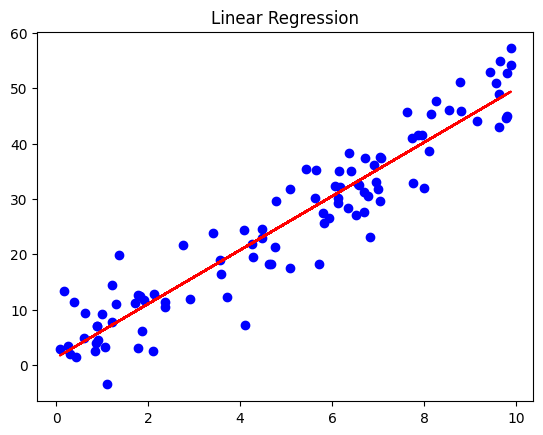

In [20]:
# Task 19: Linear regression and visualization
X = np.random.rand(100, 1) * 10
y = 5 * X + np.random.randn(100, 1) * 5
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Linear Regression')
plt.show()


In [21]:
# Task 20: Multiple linear regression with 3 features
X, y = make_regression(n_samples=150, n_features=3, noise=0.1)
model = LinearRegression().fit(X, y)
print("R-squared score:", model.score(X, y))
print("Coefficients:", model.coef_)


R-squared score: 0.9999979695858289
Coefficients: [10.11407914 10.73175574 66.77541841]


In [22]:
# Task 21: Pickling a trained model
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('linear_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Loaded Model Prediction:", loaded_model.predict(X[:5]))

Loaded Model Prediction: [-131.42976889  102.98420202  -49.41227018  -98.17414056  -36.41666915]


In [30]:
# Task 22: Linear regression with categorical features (tips dataset)
data = sns.load_dataset('tips')
X = data[['total_bill', 'size']]
y = data['tip']
encoder = OneHotEncoder(drop='first')
categorical = data[['sex', 'smoker', 'day', 'time']]
transformer = ColumnTransformer([
    ('onehot', encoder, categorical.columns),
    ('scaler', StandardScaler(), ['total_bill', 'size'])
])
pipeline = Pipeline([
    ('transform', transformer),
    ('regressor', LinearRegression())
])
pipeline.fit(data, y)
print("R-squared score:", pipeline.score(data, y))

R-squared score: 0.47007812322060794


In [33]:
# Task 23: Ridge vs Linear regression comparison
X, y = make_regression(n_samples=200, n_features=3, noise=0.1)
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
linear = LinearRegression().fit(X, y)
print("Linear Regression Coefficients:", linear.coef_)
print("Ridge Regression Coefficients:", ridge.coef_)
print("Linear Regression R-squared:", linear.score(X, y))
print("Ridge Regression R-squared:", ridge.score(X, y))

Linear Regression Coefficients: [55.45201115 86.39950439 65.41797883]
Ridge Regression Coefficients: [55.15232974 85.94002734 65.07090847]
Linear Regression R-squared: 0.9999993736272644
Ridge Regression R-squared: 0.9999709417684148


In [36]:
# Task 24: Cross-validation for linear regression
scores = cross_val_score(LinearRegression(), X, y, cv=5)
print("Cross-validated R-squared scores:", scores)

Cross-validated R-squared scores: [0.99999934 0.99999949 0.99999928 0.999999   0.99999951]


In [26]:
# Task 25: Comparing polynomial regression models of different degrees
for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X[:, :1])  # Use single feature for simplicity
    model = LinearRegression().fit(X_poly, y)
    print(f"Degree {degree} R-squared:", model.score(X_poly, y))


Degree 1 R-squared: 8.189404451797166e-06
Degree 2 R-squared: 0.006483805995384451
Degree 3 R-squared: 0.006484004410339028
Degree 4 R-squared: 0.0072524178684892915
